In [46]:
# Importing the basic calculation, dataframe and visualization libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

# Set random seed
np.random.seed(0)

Saving datasets_dataset.csv to datasets_dataset.csv


In [7]:
import io
df = pd.read_csv(io.BytesIO(uploaded['datasets_dataset.csv']))
# Dataset is now stored in a Pandas Dataframe

df.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5,16.09,5.00,21.88,5.0,5.00,5.0,82.97,0,0,0,0,7,30,1,0,30,4,0,0,14,39,2,0,24,6,1,0,28,30,2,0,2,0,1,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5,17.83,5.00,22.27,5.0,4.00,5.0,82.43,8,0,0,0,61,10,3,8,100,4,4,3,130,16,1,4,48,19,5,5,57,22,2,4,31,9,0,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5,15.22,5.00,27.05,2.5,5.00,5.0,79.44,4,0,0,0,19,10,3,3,25,4,0,2,50,19,2,2,28,6,0,2,14,20,2,0,12,4,0,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5,10.00,5.00,31.02,5.0,3.13,5.0,80.65,12,0,0,1,30,10,1,6,79,4,2,2,240,27,2,1,47,4,3,1,99,19,4,0,29,4,5,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5,12.17,4.93,15.91,5.0,4.67,5.0,67.68,6,0,0,0,0,0,0,0,27,5,0,0,6,15,1,0,32,12,0,8,22,18,1,2,43,4,3,6,8,5,1,1,5,3,1,0,2


In [8]:
# Checking the missing values
df.isnull().sum()

ID             0
Week2_Quiz1    0
Week3_MP1      0
Week3_PR1      0
Week5_MP2      0
Week5_PR2      0
Week7_MP3      0
Week7_PR3      0
Week4_Quiz2    0
Week6_Quiz3    0
Week8_Total    0
Week1_Stat0    0
Week1_Stat1    0
Week1_Stat2    0
Week1_Stat3    0
Week2_Stat0    0
Week2_Stat1    0
Week2_Stat2    0
Week2_Stat3    0
Week3_Stat0    0
Week3_Stat1    0
Week3_Stat2    0
Week3_Stat3    0
Week4_Stat0    0
Week4_Stat1    0
Week4_Stat2    0
Week4_Stat3    0
Week5_Stat0    0
Week5_Stat1    0
Week5_Stat2    0
Week5_Stat3    0
Week6_Stat0    0
Week6_Stat1    0
Week6_Stat2    0
Week6_Stat3    0
Week7_Stat0    0
Week7_Stat1    0
Week7_Stat2    0
Week7_Stat3    0
Week8_Stat0    0
Week8_Stat1    0
Week8_Stat2    0
Week8_Stat3    0
Week9_Stat0    0
Week9_Stat1    0
Week9_Stat2    0
Week9_Stat3    0
Grade          0
dtype: int64

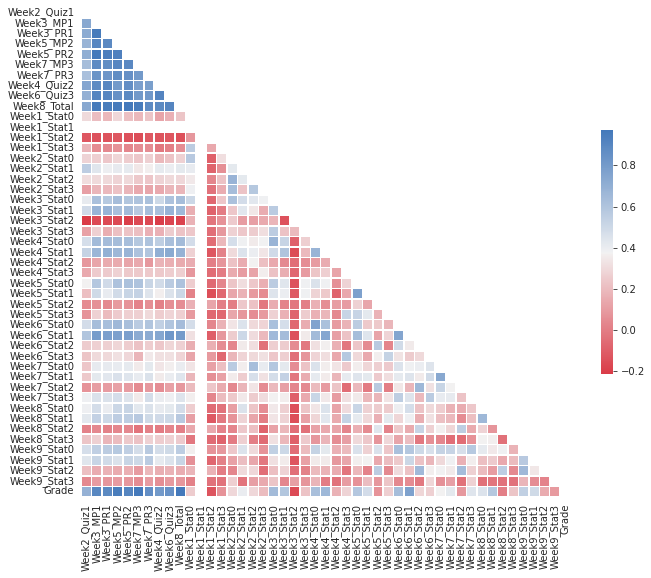

In [9]:
# use the pands .corr() function to compute pairwise correlations for the dataframe
corr = df.corr()
# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [11]:
df.drop(['Week1_Stat0', 'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3', 'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3', 
         'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3', 'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3',
         'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3', 'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3',
         'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3', 'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3',
         'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3'], axis = 1, inplace = True)

In [12]:
df.drop([12, 25, 34, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 
         94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106], axis = 0, inplace = True)

In [13]:
df

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Grade
0,ML-2020-1,5.00,15.0,5,16.09,5.00,21.88,5.0,5.00,5.0,82.97,4
1,ML-2020-2,3.33,15.0,5,17.83,5.00,22.27,5.0,4.00,5.0,82.43,4
2,ML-2020-3,1.67,13.0,5,15.22,5.00,27.05,2.5,5.00,5.0,79.44,3
3,ML-2020-4,2.50,14.0,5,10.00,5.00,31.02,5.0,3.13,5.0,80.65,3
4,ML-2020-6,0.00,15.0,5,12.17,4.93,15.91,5.0,4.67,5.0,67.68,2
...,...,...,...,...,...,...,...,...,...,...,...,...
73,ML-2020-100,2.50,14.0,5,18.26,5.00,28.64,0.0,3.00,5.0,81.40,4
74,ML-2020-102,5.00,15.0,5,19.57,5.00,34.60,5.0,5.00,5.0,99.17,5
75,ML-2020-103,4.17,11.0,5,18.26,4.90,31.02,5.0,5.00,4.5,88.85,4
76,ML-2020-104,5.00,15.0,5,17.83,5.00,28.24,5.0,4.17,5.0,90.24,4


In [33]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

features = ['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2', 'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week8_Total']
label = ['Grade']
X = df[features]  # Features
y = df[label]  # Label

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [19]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [27]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9130434782608695


In [36]:
feature_imp = pd.Series(clf.feature_importances_, index = features).sort_values(ascending=False)
feature_imp

Week8_Total    0.376436
Week7_MP3      0.182724
Week5_MP2      0.155847
Week5_PR2      0.069866
Week3_MP1      0.055079
Week4_Quiz2    0.048194
Week3_PR1      0.035940
Week2_Quiz1    0.030758
Week6_Quiz3    0.028650
Week7_PR3      0.016506
dtype: float64

No handles with labels found to put in legend.


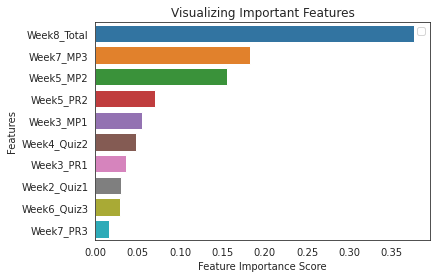

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [44]:
# Plot feature importances
wandb.sklearn.plot_feature_imp(model, [‘width’, ‘height, ‘length’])

SyntaxError: ignored

In [45]:
# Plot learning curve
wandb.sklearn.plot_learning_curve(model, X, y)

NameError: ignored

In [38]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(df.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

NameError: ignored